In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [4]:
iris = load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [5]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
'''
    -----------------------------------------------------------------------------------------------------------------
    1. Other options are to use, 
        SVM(kernel='linear', C=1) -> Slow as hell
        SGDClassifier(loss='hinge', alpha= 1/(m*C)) -> Applies Stochastic Gradient Descent to train a linear SVM classifier, slower than LinearSVC but good for larger data and out-of-core learning.
    -----------------------------------------------------------------------------------------------------------------
    2. Set dual-hyperparameters to false, unless there are more features than instances.
'''

"\n    -----------------------------------------------------------------------------------------------------------------\n    1. Other options are to use, \n        SVM(kernel='linear', C=1) -> Slow as hell\n        SGDClassifier(loss='hinge', alpha= 1/(m*C)) -> Applies Stochastic Gradient Descent to train a linear SVM classifier, slower than LinearSVC but good for larger data and out-of-core learning.\n    -----------------------------------------------------------------------------------------------------------------\n    2. Set dual-hyperparameters to false, unless there are more features than instances.\n"

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [8]:

def plotSVC(title, model, X, y, bins=100, marker='o'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min)/bins
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, marker=marker)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

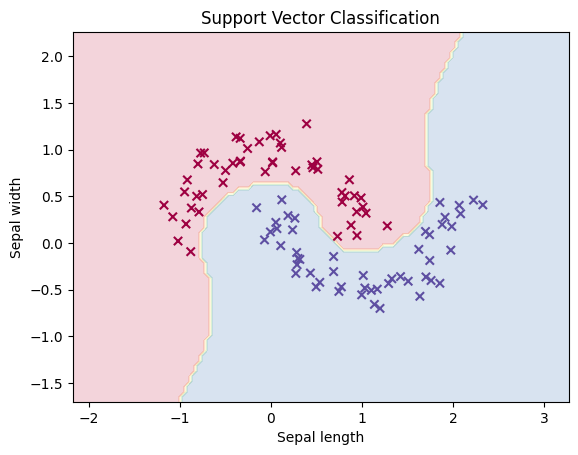

In [9]:
plotSVC("Support Vector Classification", polynomial_svm_clf, X, y, bins=100, marker='x')

In [10]:
'''
    -----------------------------------------------------------------------------------------------------------------
    Polynomial Kernel: Advantages because you can handle non-linearly separable data, without having to deal with combinatorial explosion.
    -----------------------------------------------------------------------------------------------------------------
    It uses a kernel trick.
    -----------------------------------------------------------------------------------------------------------------
    Implemented using the SVC class
    -----------------------------------------------------------------------------------------------------------------
'''

'\n    -----------------------------------------------------------------------------------------------------------------\n    Polynomial Kernel: Advantages because you can handle non-linearly separable data, without having to deal with combinatorial explosion.\n    -----------------------------------------------------------------------------------------------------------------\n    It uses a kernel trick.\n    -----------------------------------------------------------------------------------------------------------------\n    Implemented using the SVC class\n    -----------------------------------------------------------------------------------------------------------------\n'

In [11]:
from sklearn.svm import SVC

poly_kernel_svm_clf_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf_3.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

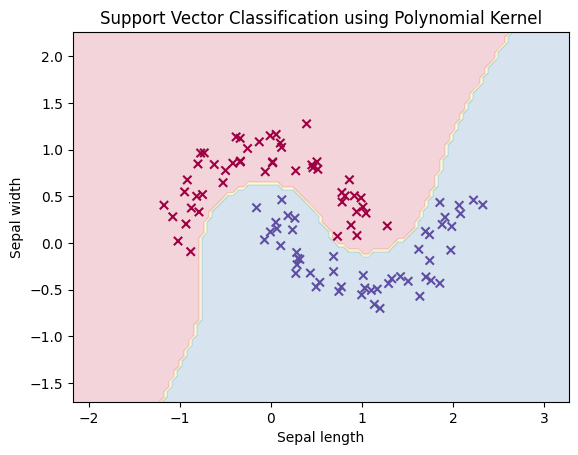

In [12]:
plotSVC("Support Vector Classification using Polynomial Kernel", poly_kernel_svm_clf_3, X, y, bins=100, marker='x')

In [13]:
poly_kernel_svm_clf_5 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=5, coef0=1, C=5))
])
poly_kernel_svm_clf_5.fit(X, y)

poly_kernel_svm_clf_10 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
])
poly_kernel_svm_clf_10.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

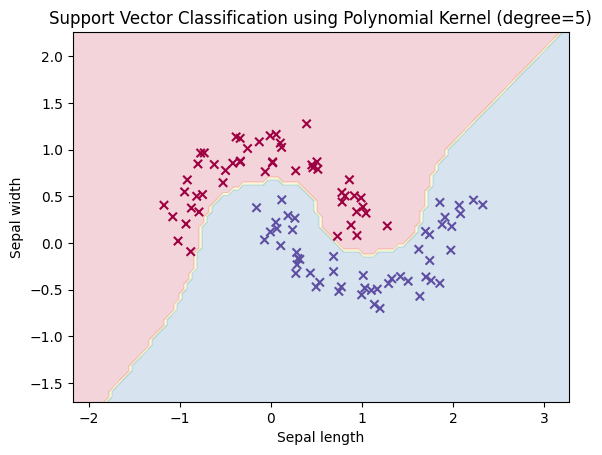

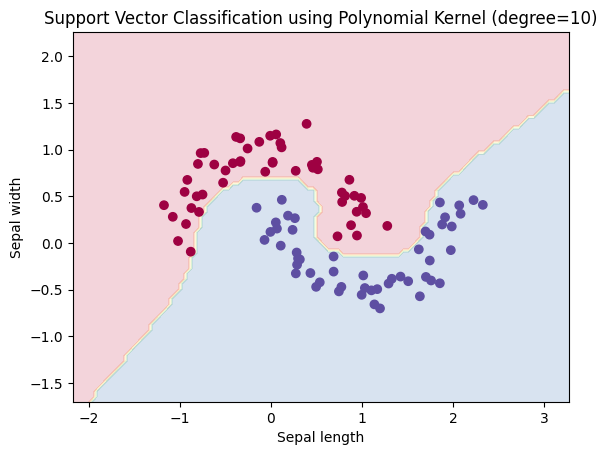

In [14]:
plotSVC("Support Vector Classification using Polynomial Kernel (degree=5)", poly_kernel_svm_clf_5, X, y, bins=100, marker='x')
plotSVC("Support Vector Classification using Polynomial Kernel (degree=10)", poly_kernel_svm_clf_10, X, y, bins=100, marker='o')

In [15]:
# Gaussian RBF Kernel
# The RBF kernel is a popular choice for SVMs, especially for non-linear classification tasks.
# It maps the input features into an infinite-dimensional space, allowing for complex decision boundaries.
# The RBF kernel is defined as:
# K(x, l) = exp(-γ ||x - l||²), where γ (gamma) is a hyperparameter that controls the width of the Gaussian kernel & l is the landmark.
# For a smaller gamma, the decision boundary is smoother, while a larger gamma leads to a more complex boundary that can overfit the data.
# l is a landmark, which is a point in the input space that the kernel function uses to compute the similarity with other points.
# A popular choice for the RBF kernel is to set gamma to 1/(number of features * variance of the data). And to use all the instances as landmarks.
# But this can convert an n-dimensional problem into an infinite-dimensional one, which can be computationally expensive. If there are m instances, then the kernel matrix will be m x m.

svm_rbf_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

svm_rbf_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

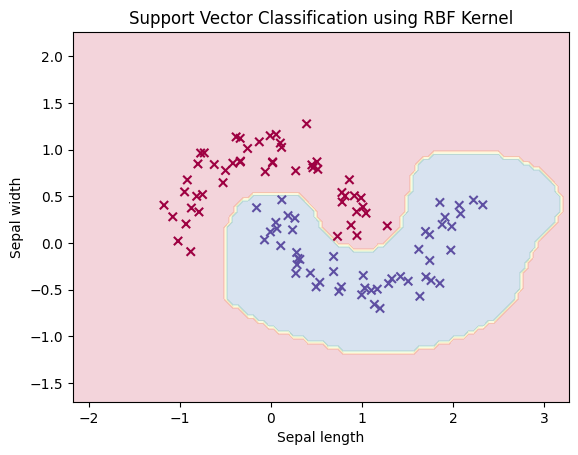

In [16]:
plotSVC("Support Vector Classification using RBF Kernel", svm_rbf_clf, X, y, bins=100, marker='x')

# Support Vector Regression

In [17]:
from sklearn.svm import LinearSVR
# LinearSVR is used for regression tasks, similar to LinearSVC but for regression. It tries to fit as many instances as possible within a certain margin of tolerance (epsilon).
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_reg", LinearSVR(epsilon=1.50)),
])


In [18]:
svm_reg.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(epsilon=1.5))])

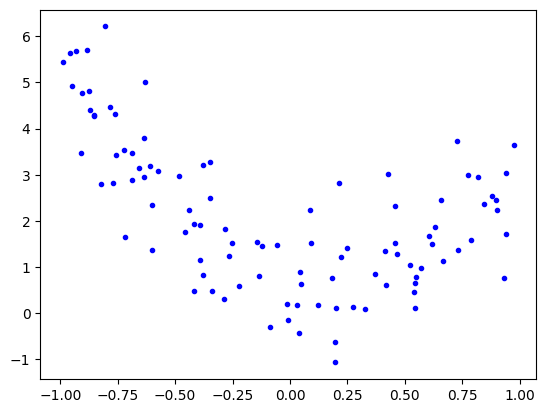

In [58]:
np.random.seed(42)
X_42deg = np.random.rand(100, 1) * 2 - 1
y_2deg = 3 * X_42deg**2 - 1 * X_42deg + 1 + np.random.randn(100, 1)

plt.plot(X_42deg, y_2deg, "b.")

In [65]:
from sklearn.svm import SVR
svm_poly_reg_1e2e_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_reg", SVR(kernel="poly", degree=2, C=100, epsilon=0.1))
])

svm_poly_reg_1e2e_1.fit(X_42deg, y_2deg.ravel())

svm_poly_reg_1e0e_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_reg", SVR(kernel="poly", degree=2, C=1, epsilon=0.1)),
])

svm_poly_reg_1e0e_1.fit(X_42deg, y_2deg.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', SVR(C=1, degree=2, kernel='poly'))])

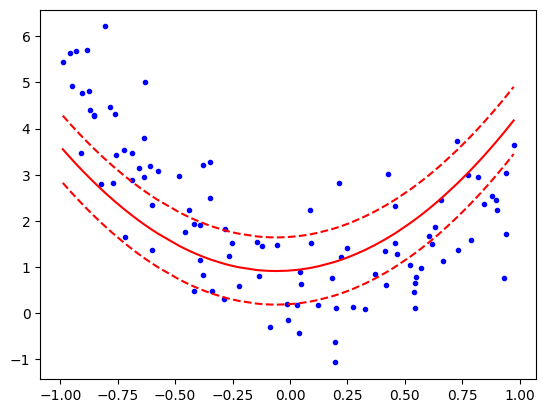

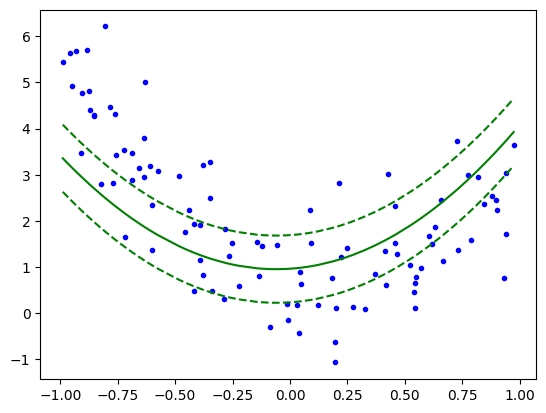

In [80]:
plt.plot(X_42deg, y_2deg, "b.")

plt.plot(sorted(X_42deg), svm_poly_reg_1e2e_1.predict(sorted(X_42deg)), "r-", label="Predictions (C=100)")
plt.plot(sorted(X_42deg), (svm_poly_reg_1e2e_1.predict(sorted(X_42deg))+0.1*(np.max(y_2deg)-np.min(y_2deg))), "r--")
plt.plot(sorted(X_42deg), (svm_poly_reg_1e2e_1.predict(sorted(X_42deg))-0.1*(np.max(y_2deg)-np.min(y_2deg))), "r--")
plt.show()

plt.plot(X_42deg, y_2deg, "b.")
plt.plot(sorted(X_42deg), svm_poly_reg_1e0e_1.predict(sorted(X_42deg)), "g-", label="Predictions (C=1)")
plt.plot(sorted(X_42deg), (svm_poly_reg_1e0e_1.predict(sorted(X_42deg))+0.1*(np.max(y_2deg)-np.min(y_2deg))), "g--")
plt.plot(sorted(X_42deg), (svm_poly_reg_1e0e_1.predict(sorted(X_42deg))-0.1*(np.max(y_2deg)-np.min(y_2deg))), "g--")